In [1]:
import numpy as np
from time import time
import os
import sys
import scipy
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.linalg import toeplitz
from sklearn.linear_model import LassoLarsIC
from sklearn.linear_model import RidgeCV
from sklearn.cluster import KMeans
from skimage.filters import threshold_triangle

import bigbadbrain as bbb

In [26]:
flies = list(range(30,44))
fictracs = []
root_path = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20190101_walking_dataset'
for fly in flies:
    funcs = []
    fly_dir = os.path.join(root_path, 'fly_{}'.format(fly))
    funcs = os.listdir(fly_dir)
    for func in funcs:
        try:
            fictrac = bbb.load_fictrac(os.path.join(fly_dir, func, 'fictrac'))
            fictracs.append(fictrac)
            print(fly)
        except:
            pass


~~ load_fictrac ~~
load_fictrac done. Duration: 3.14 sec
30

~~ load_fictrac ~~

~~ load_fictrac ~~

~~ load_fictrac ~~

~~ load_fictrac ~~

~~ load_fictrac ~~

~~ load_fictrac ~~

~~ load_fictrac ~~

~~ load_fictrac ~~
load_fictrac done. Duration: 3.19 sec
33

~~ load_fictrac ~~

~~ load_fictrac ~~
load_fictrac done. Duration: 3.26 sec
33

~~ load_fictrac ~~

~~ load_fictrac ~~

~~ load_fictrac ~~
load_fictrac done. Duration: 3.24 sec
34

~~ load_fictrac ~~
load_fictrac done. Duration: 3.25 sec
34

~~ load_fictrac ~~

~~ load_fictrac ~~

~~ load_fictrac ~~

~~ load_fictrac ~~

~~ load_fictrac ~~

~~ load_fictrac ~~
load_fictrac done. Duration: 3.23 sec
35

~~ load_fictrac ~~

~~ load_fictrac ~~
load_fictrac done. Duration: 3.12 sec
36

~~ load_fictrac ~~
load_fictrac done. Duration: 3.21 sec
36

~~ load_fictrac ~~

~~ load_fictrac ~~

~~ load_fictrac ~~

~~ load_fictrac ~~
load_fictrac done. Duration: 3.24 sec
37

~~ load_fictrac ~~

~~ load_fictrac ~~

~~ load_fictrac ~~
load_fictra

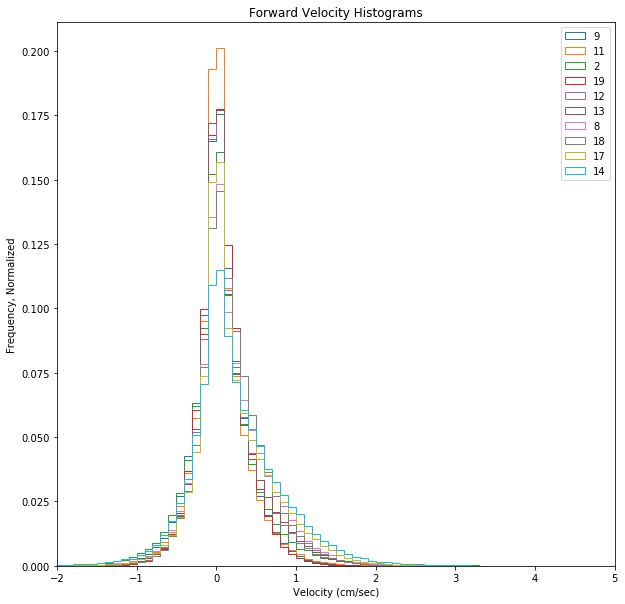

In [34]:
########################################
### Plot Forward Velocity Histograms ###
########################################

bins = np.ndarray.tolist(np.arange(-2,5,.1))
fig = plt.figure(figsize=(10,10))
behavior = 'dRotLabY'
sphere_radius = 3.175e-3 #4.5e-3
binned_data = []
#for i in range(len(fictracs)):
for i in [9, 11,  2, 19, 12, 13,  8, 18, 17, 14]:
    vector = fictracs[i][behavior]*sphere_radius # now in m per 20ms
    vector = vector * 100 * 100 # multiply by Hz and cm/meter # now in cm per sec
    weights = np.ones_like(vector)/float(len(vector))
    binned,throwaway,throwaway2=plt.hist(vector,bins,weights=weights,label = str(i),stacked=True, histtype = 'step')
    binned_data.append(binned)
plt.legend()
plt.xlim(-2,5)
plt.xlabel("Velocity (cm/sec)")
plt.ylabel("Frequency, Normalized")
plt.title("Forward Velocity Histograms")
plt.show()

In [44]:
plt.rcParams.update({'font.size': 36})

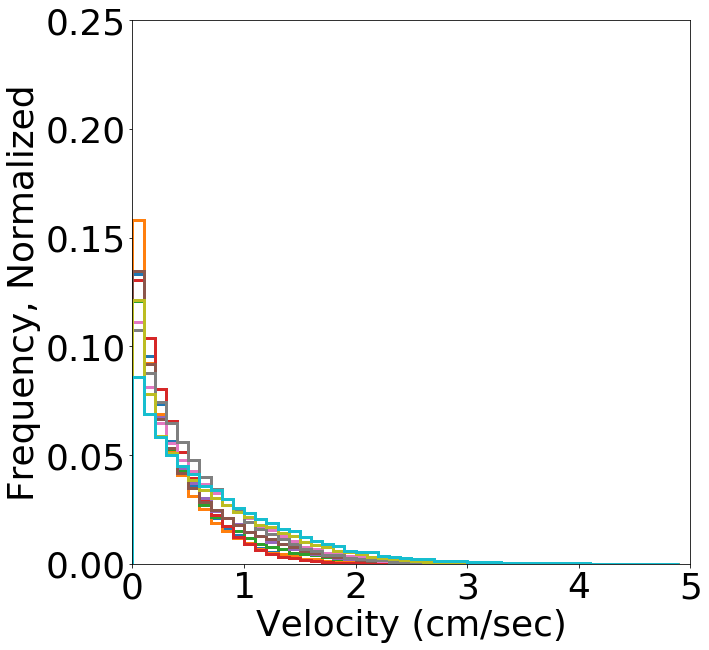

In [86]:
########################################
### Plot Forward Velocity Histograms ###
########################################

bins = np.ndarray.tolist(np.arange(0,5,.1))
fig = plt.figure(figsize=(10,10))
behavior = 'dRotLabY'
sphere_radius = 4.5e-3 #3.175e-3 #
binned_data = []
#for i in range(len(fictracs)):
for i in [9, 11,  2, 19, 12, 13,  8, 18, 17, 14]:
    vector = fictracs[i][behavior]*sphere_radius # now in m per 20ms
    vector = vector * 100 * 100 # multiply by Hz and cm/meter # now in cm per sec
    weights = np.ones_like(vector)/float(len(vector))
    binned,throwaway,throwaway2=plt.hist(vector,bins,weights=weights,label = str(i),stacked=True, histtype = 'step',linewidth=3)
    binned_data.append(binned)
plt.xlim(0,5)
plt.ylim(0,.25)
plt.xlabel("Velocity (cm/sec)")
plt.ylabel("Frequency, Normalized")
#plt.title("Forward Velocity Histograms")
plt.show()

In [29]:
sums = []
for i in range(len(fictracs)):
    vector = fictracs[i][behavior]*sphere_radius # now in m per 20ms
    sums.append(np.sum(vector))
    

In [31]:
np.argsort(sums)

array([ 4,  1, 15,  0, 16,  6,  7,  3,  5, 10,  9, 11,  2, 19, 12, 13,  8,
       18, 17, 14])

In [33]:
sums[14]

2.050918964157814

In [16]:
weights[100:]

array([1.1080578e-05, 1.1080578e-05, 1.1080578e-05, ..., 1.1080578e-05,
       1.1080578e-05, 1.1080578e-05])

In [9]:
np.ones_like([4,3,4])

array([1, 1, 1])

In [11]:
np.min(vector)

-5.605062425446455

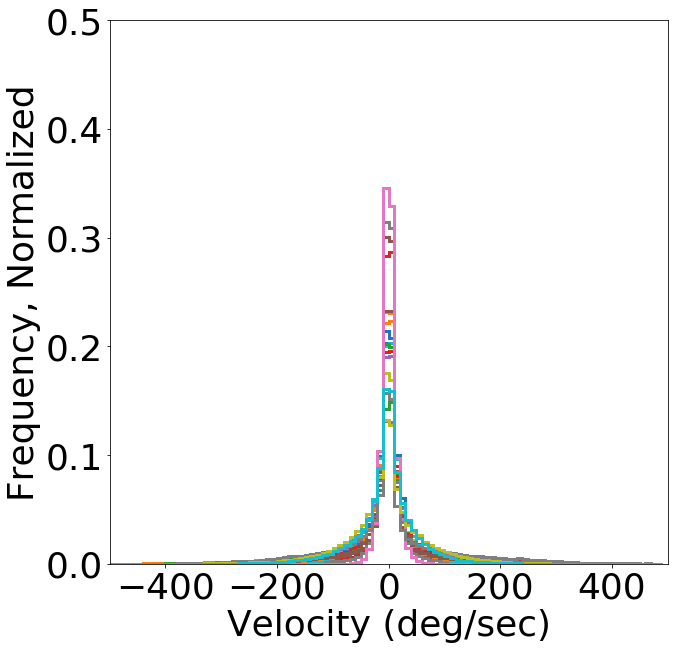

In [95]:
########################################
### Plot Angular Velocity Histograms ###
########################################

bins = np.ndarray.tolist(np.arange(-500,500,10))
fig = plt.figure(figsize=(10,10))
behavior = 'dRotLabZ'
sphere_radius = 4.5e-3 #3.175e-3 #
binned_data = []
for i in range(len(fictracs)):
    vector = np.rad2deg(fictracs[i][behavior]) # now in deg per 20ms
    vector = vector * 50 # now in deg per sec
    weights = np.ones_like(vector)/float(len(vector))
    binned,throwaway,throwaway2=plt.hist(vector,bins,weights=weights,label = str(i),stacked=True, linewidth=3,histtype = 'step')
    binned_data.append(binned)

#plt.legend()
plt.xlim(-500,500)
plt.ylim(0,.5)
plt.xlabel("Velocity (deg/sec)")
plt.ylabel("Frequency, Normalized")
#plt.title("Side-slip Velocity")
plt.show()

In [ ]:
########################################
### Plot Angular Velocity Histograms ###
########################################

bins = np.ndarray.tolist(np.arange(-500,500,10))
fig = plt.figure(figsize=(10,10))
behavior = 'dRotLabZ'
sphere_radius = 4.5e-3 #3.175e-3 #
binned_data = []
for i in range(len(fictracs)):
    vector = np.rad2deg(fictracs[i][behavior]) # now in deg per 20ms
    vector = vector * 50 # now in deg per sec
    weights = np.ones_like(vector)/float(len(vector))
    binned,throwaway,throwaway2=plt.hist(vector,bins,weights=weights,label = str(i),stacked=True, linewidth=3,histtype = 'step')
    binned_data.append(binned)

#plt.legend()
plt.xlim(-500,500)
plt.ylim(0,.5)
plt.xlabel("Velocity (deg/sec)")
plt.ylabel("Frequency, Normalized")
#plt.title("Side-slip Velocity")
plt.show()

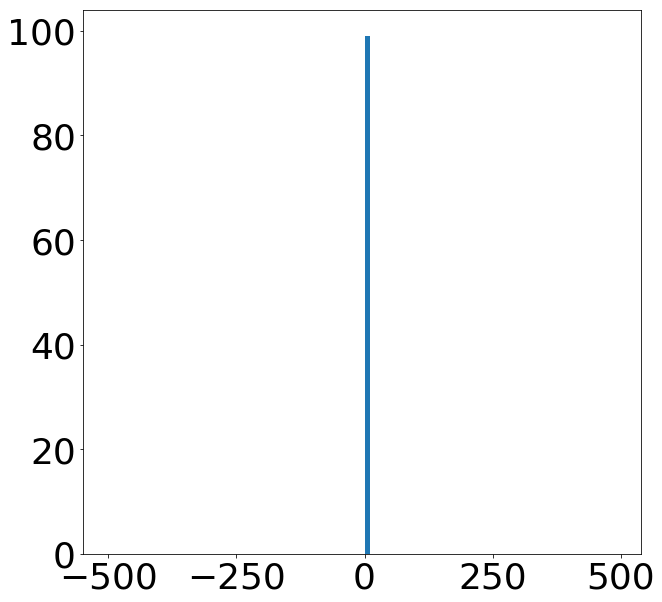

In [105]:
bins = np.ndarray.tolist(np.arange(-500,500,10))
fig = plt.figure(figsize=(10,10))
plt.hist(mean_,bins)
plt.show()

In [97]:
len(fictracs)

20

In [102]:
mean_ = np.mean(binned_data,axis=0)

In [103]:
mean_.shape

(99,)

In [96]:
np.shape(binned_data)

(20, 99)

In [64]:
root_path = 'C:/Users/User/Downloads/drive-download-20190606T161949Z-001'
files = [os.path.join(root_path, file) for file in os.listdir(root_path)]

fictracs = []
for file in files:
    fictracs.append(load_fictrac2(file))

In [65]:
len(fictracs)

21

In [51]:
thing

'C:/Users/User/Downloads/drive-download-20190606T161949Z-001\\fictrac (1).dat'

In [60]:
def load_fictrac2(directory):
    """ Loads fictrac data from .dat file that fictrac outputs.

    To-do: change units based on diameter of ball etc.
    For speed sanity check, instead remove bad frames so we don't have to throw out whole trial.

    Parameters
    ----------
    directory: string of full path to file
    file: string of file name

    Returns
    -------
    fictrac_data: pandas dataframe of all parameters saved by fictrac """

    with open(directory,'r') as f:
        df = pd.DataFrame(l.rstrip().split() for l in f)

        # Name columns
        df = df.rename(index=str, columns={0: 'frameCounter',
                                       1: 'dRotCamX',
                                       2: 'dRotCamY',
                                       3: 'dRotCamZ',
                                       4: 'dRotScore',
                                       5: 'dRotLabX',
                                       6: 'dRotLabY',
                                       7: 'dRotLabZ',
                                       8: 'AbsRotCamX',
                                       9: 'AbsRotCamY',
                                       10: 'AbsRotCamZ',
                                       11: 'AbsRotLabX',
                                       12: 'AbsRotLabY',
                                       13: 'AbsRotLabZ',
                                       14: 'positionX',
                                       15: 'positionY',
                                       16: 'heading',
                                       17: 'runningDir',
                                       18: 'speed',
                                       19: 'integratedX',
                                       20: 'integratedY',
                                       21: 'timeStamp',
                                       22: 'sequence'})

        # Remove commas
        for column in df.columns.values[:-1]:
            df[column] = [float(x[:-1]) for x in df[column]]

        fictrac_data = df
                
    # sanity check for extremely high speed (fictrac failure)
    speed = np.asarray(fictrac_data['speed'])
    max_speed = np.max(speed)
    if max_speed > 10:
        raise Exception('Fictrac ball tracking failed (reporting impossibly high speed).')
    return fictrac_data

In [50]:
#####################
###  Define Data  ###
#####################

Path = '/oak/stanford/groups/trc/data/Brezovec/VRArena/exps'
#Path = '/scratch/users/brezovec/exps'

Expts = ['exp-20181102-165424',
         'exp-20181102-175232',
         'exp-20181103-184106',
         'exp-20181104-162518',
         'exp-20181105-115608',
         'exp-20181107-181316',
         'exp-20181108-111101',
         'exp-20181108-143044',
         'exp-20181109-084314']

#Expts = ['exp-20181031-190938']

In [51]:
###########################
###  Define Trial Class ###
###########################

class Trial:
    def __init__ (self, dirName):
        print('Importing from: {}'.format(Path))
        self.cam = Cam(os.path.join(dirName, 'cam.txt'))
        self.cnc = Cnc(os.path.join(dirName, 'cnc.txt'))
        self.stimuli = Stimuli(os.path.join(dirName, 'stimuli.txt'), mode='static_stim')
        
class Cam:
    def __init__ (self, fname):
        print(fname)
        self.tvec = np.genfromtxt(fname, delimiter=',',skip_header=1,usecols=(0,))
        self.xvec = np.genfromtxt(fname, delimiter=',',skip_header=1,usecols=(2,))
        self.yvec = np.genfromtxt(fname, delimiter=',',skip_header=1,usecols=(3,))
        self.pvec = np.genfromtxt(fname, delimiter=',',skip_header=1,usecols=(1,), dtype=bool)
        self.avec = np.genfromtxt(fname, delimiter=',',skip_header=1,usecols=(6,))

class Cnc:
    def __init__ (self, fname):
        print(fname)
        self.tvec = np.genfromtxt(fname, delimiter=',',skip_header=1,usecols=(0,))
        self.xvec = np.genfromtxt(fname, delimiter=',',skip_header=1,usecols=(1,))
        self.yvec = np.genfromtxt(fname, delimiter=',',skip_header=1,usecols=(2,))

class Stimuli:
    def __init__ (self, fname, mode):
        print(fname)
        
        if mode == 'static_stim':
            self.dict = stim_parser(fname)
            
        elif mode == 'moving_stim':
            with open(fname) as file:  
                data = file.read() 
            d=data.split('@')
            newStimTimes = [item for item in d if 'NewStim' in item]
            updateStimTimes = [item for item in d if 'UpdateStim' in item]
            StimTimesMessy = newStimTimes + updateStimTimes
            StimTimes = [float(item.split(' ')[0]) for item in StimTimesMessy]
            self.stimtimes = StimTimes

            ratesMessy = [item.split('\n') for item in StimTimesMessy]
            rates_nice = [item for sublist in ratesMessy for item in sublist]
            rates_only = [item for item in rates_nice if 'rate' in item]
            rates = [int(item.split(' ')[3]) for item in rates_only]
            self.rates = rates
            
        else:
            assert('invalid stimuli mode')
        
## For importing files in correct order:
def tryint(s):
    try:
        return int(s)
    except:
        return s

def alphanum_key(s):
    return [tryint(c) for c in re.split('([0-9]+)', s)]

def sort_nicely(x):
    x.sort(key=alphanum_key)
    
def stim_parser(fname):
    with open(fname) as file:  
        data = file.read() 
    d = data.split('\n')
    kv_pair = [item for item in d if ':' in item and '@' not in item]
    stim_dict = {}
    for item in kv_pair:
        key = item.split(':')[0]
        value = item.split(':')[1]
        key = re.sub(" |'|\"|,", "", key)
        value = re.sub(" |'|\"|,", "", value)
        stim_dict[key] = value
    return stim_dict

In [57]:
import re
from scipy.ndimage.interpolation import shift


In [54]:
#####################
###  Import Data  ###
#####################

trials = []        
for expt in Expts:
    dirNames = os.listdir(os.path.join(Path, expt))
    dirNames = [x for x in dirNames if 'trial' in x]
    sort_nicely(dirNames)
    trials.append(([Trial(os.path.join(Path, expt, dirName)) for dirName in dirNames]))
trials = [item for sublist in trials for item in sublist]

Importing from: /oak/stanford/groups/trc/data/Brezovec/VRArena/exps
/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181102-165424/trial-1-20181102-170040/cam.txt
/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181102-165424/trial-1-20181102-170040/cnc.txt
/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181102-165424/trial-1-20181102-170040/stimuli.txt
Importing from: /oak/stanford/groups/trc/data/Brezovec/VRArena/exps
/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181102-165424/trial-2-20181102-170055/cam.txt
/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181102-165424/trial-2-20181102-170055/cnc.txt
/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181102-165424/trial-2-20181102-170055/stimuli.txt
Importing from: /oak/stanford/groups/trc/data/Brezovec/VRArena/exps
/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181102-165424/trial-3-20181102-170301/cam.txt
/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-2018

/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181102-175232/trial-14-20181102-192609/cnc.txt
/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181102-175232/trial-14-20181102-192609/stimuli.txt
Importing from: /oak/stanford/groups/trc/data/Brezovec/VRArena/exps
/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181102-175232/trial-15-20181102-192931/cam.txt
/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181102-175232/trial-15-20181102-192931/cnc.txt
/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181102-175232/trial-15-20181102-192931/stimuli.txt
Importing from: /oak/stanford/groups/trc/data/Brezovec/VRArena/exps
/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181102-175232/trial-16-20181102-193118/cam.txt
/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181102-175232/trial-16-20181102-193118/cnc.txt
/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181102-175232/trial-16-20181102-193118/stimuli.txt
Importing fr

/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181103-184106/trial-15-20181103-194919/stimuli.txt
Importing from: /oak/stanford/groups/trc/data/Brezovec/VRArena/exps
/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181103-184106/trial-16-20181103-213635/cam.txt
/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181103-184106/trial-16-20181103-213635/cnc.txt
/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181103-184106/trial-16-20181103-213635/stimuli.txt
Importing from: /oak/stanford/groups/trc/data/Brezovec/VRArena/exps
/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181103-184106/trial-17-20181103-223722/cam.txt
/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181103-184106/trial-17-20181103-223722/cnc.txt
/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181103-184106/trial-17-20181103-223722/stimuli.txt
Importing from: /oak/stanford/groups/trc/data/Brezovec/VRArena/exps
/oak/stanford/groups/trc/data/Brezovec/VRArena/ex

/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181105-115608/trial-9-20181105-130753/cnc.txt
/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181105-115608/trial-9-20181105-130753/stimuli.txt
Importing from: /oak/stanford/groups/trc/data/Brezovec/VRArena/exps
/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181105-115608/trial-10-20181105-131242/cam.txt
/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181105-115608/trial-10-20181105-131242/cnc.txt
/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181105-115608/trial-10-20181105-131242/stimuli.txt
Importing from: /oak/stanford/groups/trc/data/Brezovec/VRArena/exps
/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181105-115608/trial-11-20181105-131734/cam.txt
/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181105-115608/trial-11-20181105-131734/cnc.txt
/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181105-115608/trial-11-20181105-131734/stimuli.txt
Importing from

/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181105-115608/trial-31-20181105-152448/cnc.txt
/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181105-115608/trial-31-20181105-152448/stimuli.txt
Importing from: /oak/stanford/groups/trc/data/Brezovec/VRArena/exps
/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181107-181316/trial-1-20181107-181948/cam.txt
/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181107-181316/trial-1-20181107-181948/cnc.txt
/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181107-181316/trial-1-20181107-181948/stimuli.txt
Importing from: /oak/stanford/groups/trc/data/Brezovec/VRArena/exps
/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181107-181316/trial-2-20181107-182044/cam.txt
/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181107-181316/trial-2-20181107-182044/cnc.txt
/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181107-181316/trial-2-20181107-182044/stimuli.txt
Importing from: /o

/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181107-181316/trial-21-20181107-191239/stimuli.txt
Importing from: /oak/stanford/groups/trc/data/Brezovec/VRArena/exps
/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181107-181316/trial-22-20181107-191545/cam.txt
/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181107-181316/trial-22-20181107-191545/cnc.txt
/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181107-181316/trial-22-20181107-191545/stimuli.txt
Importing from: /oak/stanford/groups/trc/data/Brezovec/VRArena/exps
/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181107-181316/trial-23-20181107-192031/cam.txt
/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181107-181316/trial-23-20181107-192031/cnc.txt
/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181107-181316/trial-23-20181107-192031/stimuli.txt
Importing from: /oak/stanford/groups/trc/data/Brezovec/VRArena/exps
/oak/stanford/groups/trc/data/Brezovec/VRArena/ex

/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181108-111101/trial-19-20181108-120822/cnc.txt
/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181108-111101/trial-19-20181108-120822/stimuli.txt
Importing from: /oak/stanford/groups/trc/data/Brezovec/VRArena/exps
/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181108-111101/trial-20-20181108-121054/cam.txt
/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181108-111101/trial-20-20181108-121054/cnc.txt
/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181108-111101/trial-20-20181108-121054/stimuli.txt
Importing from: /oak/stanford/groups/trc/data/Brezovec/VRArena/exps
/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181108-111101/trial-21-20181108-121508/cam.txt
/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181108-111101/trial-21-20181108-121508/cnc.txt
/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181108-111101/trial-21-20181108-121508/stimuli.txt
Importing fr

/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181108-143044/trial-14-20181108-154747/cnc.txt
/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181108-143044/trial-14-20181108-154747/stimuli.txt
Importing from: /oak/stanford/groups/trc/data/Brezovec/VRArena/exps
/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181108-143044/trial-15-20181108-154904/cam.txt
/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181108-143044/trial-15-20181108-154904/cnc.txt
/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181108-143044/trial-15-20181108-154904/stimuli.txt
Importing from: /oak/stanford/groups/trc/data/Brezovec/VRArena/exps
/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181108-143044/trial-16-20181108-155314/cam.txt
/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181108-143044/trial-16-20181108-155314/cnc.txt
/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181108-143044/trial-16-20181108-155314/stimuli.txt
Importing fr

/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181109-084314/trial-4-20181109-090724/stimuli.txt
Importing from: /oak/stanford/groups/trc/data/Brezovec/VRArena/exps
/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181109-084314/trial-5-20181109-090820/cam.txt
/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181109-084314/trial-5-20181109-090820/cnc.txt
/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181109-084314/trial-5-20181109-090820/stimuli.txt
Importing from: /oak/stanford/groups/trc/data/Brezovec/VRArena/exps
/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181109-084314/trial-6-20181109-091659/cam.txt
/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181109-084314/trial-6-20181109-091659/cnc.txt
/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181109-084314/trial-6-20181109-091659/stimuli.txt
Importing from: /oak/stanford/groups/trc/data/Brezovec/VRArena/exps
/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-

In [55]:
########################
### Define Fly Class ###
########################

class Fly:
    def __init__ (self,trial,time_res=0.01,sigma=0):
        mode = 'static_stim'
        if np.any(trial.cam.pvec):
            # Get cam data (only time points where pvec is true, aka fly is present)
            camt = trial.cam.tvec[trial.cam.pvec]
            #Interpolate
            cama = interp1d(camt, trial.cam.avec[trial.cam.pvec],kind='nearest')
            camx = interp1d(camt, trial.cam.xvec[trial.cam.pvec])
            camy = interp1d(camt, trial.cam.yvec[trial.cam.pvec])
            # Get cnc data
            cncx = interp1d(trial.cnc.tvec, trial.cnc.xvec)
            cncy = interp1d(trial.cnc.tvec, trial.cnc.yvec)
            tmin = max(camt[0], trial.cnc.tvec[0])
            tmax = min(camt[-1], trial.cnc.tvec[-1])
            # Pull from interpolated data at chosen time resolution, and add camera and cnc positions
            self.t = np.arange(tmin, tmax, time_res)
            self.x = camx(self.t) + cncx(self.t)
            self.y = camy(self.t) + cncy(self.t)
            self.a = cama(self.t)
            # Unwrap angles and rotate
            self.angleUnwrapper()
            #self.a=angleChangeOrigin(self.a)
            self.a = 90-self.a #rotate angles 90deg to change ellipse fitting defined angles
            self.a = -self.a #flip angle horizontally due to camera flip
            # Smooth if asked to
            if sigma is not 0:
                self.x = scipy.ndimage.filters.gaussian_filter1d(self.x,sigma)
                self.y = scipy.ndimage.filters.gaussian_filter1d(self.y,sigma)
                self.a = scipy.ndimage.filters.gaussian_filter1d(self.a,sigma)
            self.tvid = self.t - camt[0] #for video debugging
            self.velocity()
            x_covered = np.sum(np.abs(np.diff(self.x)))
            y_covered = np.sum(np.abs(np.diff(self.y)))
            self.dist_covered = x_covered + y_covered
            self.duration = self.t[-1]-self.t[0]
            self.a_covered = np.sum(np.abs(np.diff(self.a)))
            
            if mode == 'static_stim':
                self.stimdict = trial.stimuli.dict

            elif mode == 'moving_stim':
                self.stimtimes = trial.stimuli.stimtimes
                self.rates = trial.stimuli.rates
            
        else:
            self.t = None
            self.x = None
            self.y = None
            self.a = None
            self.v = None
            self.tvid = None    
    def angleUnwrapper(self):
        jumpThresh=150
        angles=[]
        angle_offset=0
        for k, angle in enumerate(self.a):
            if k == 0:
                angles.append(angle)
                continue
            angle += angle_offset
            if angles[-1]-angle > jumpThresh:
                angle_offset += 180
                angle += 180
            elif angle-angles[-1] > jumpThresh:
                angle_offset -= 180
                angle -= 180
            angles.append(angle)
        self.a = np.array(angles)
    def velocity(self):
        x1 = self.x
        y1 = self.y
        a1 = self.a
        x2 = shift(x1,-1,cval=np.NaN)
        y2 = shift(y1,-1,cval=np.NaN)
        a2 = shift(a1,-1,cval=np.NaN)
        # Calculate velocity
        dist = (((x2-x1)**2)+((y2-y1)**2))**0.5
        self.v = dist[:-2]
        #
        vel_x = x2-x1
        self.vx = vel_x[:-2]
        vel_y = y2-y1
        self.vy = vel_y[:-2]
        # Calculate angle of velocity
        velocity_angle = np.rad2deg(np.arctan2((y2-y1),(x2-x1)))
        #fly_angle = self.a%(360)
        #angle_difference = velocity_angle-fly_angle
        #forward_component = (np.cos(angle_difference*np.pi/180))
        #self.vf = forward_component[:-2]
        self.va = velocity_angle[:-2]
        # Calculate angular velocity
        angular_velocity = a2-a1
        self.av = angular_velocity[:-2]

In [ ]:
# output is change in angle per time point
# so, *100, then deg/sec

In [ ]:
# output is meters per time point (which is 10ms)
# so * 100, then in m/sec. to get to cm/sec, need *100*100

In [58]:
###################
### BUILD FLIES ###
###################

flies = [Fly(trial,sigma=10) for trial in trials]

In [59]:
################################################
### Assign fly types based on visual stimuli ###
################################################

for fly in flies:
    if fly.stimdict['name'] == 'ConstantBackground' and fly.stimdict['background'] == '0.0':
        fly.type = 'dark'
    elif fly.stimdict['name'] == 'ConstantBackground' and fly.stimdict['background'] == '0.5':
        fly.type = 'grey'
    elif fly.stimdict['name'] == 'ConstantBackground' and fly.stimdict['background'] == '1.0':
        fly.type = 'bright'
    elif fly.stimdict['name'] == 'SineGrating' and fly.stimdict['angle'] == '0':
        fly.type = 'vertical'
    elif fly.stimdict['name'] == 'SineGrating' and fly.stimdict['angle'] == '90':
        fly.type = 'horizontal'
    elif fly.stimdict['name'] == 'RandomGrid':
        fly.type = 'checker'
    else:
        print('Did not assign type to fly with stimuli name: {}'.format(fly.stimdict['name']))

In [71]:
types

['vertical', 'horizontal', 'checker', 'dark', 'grey', 'bright']

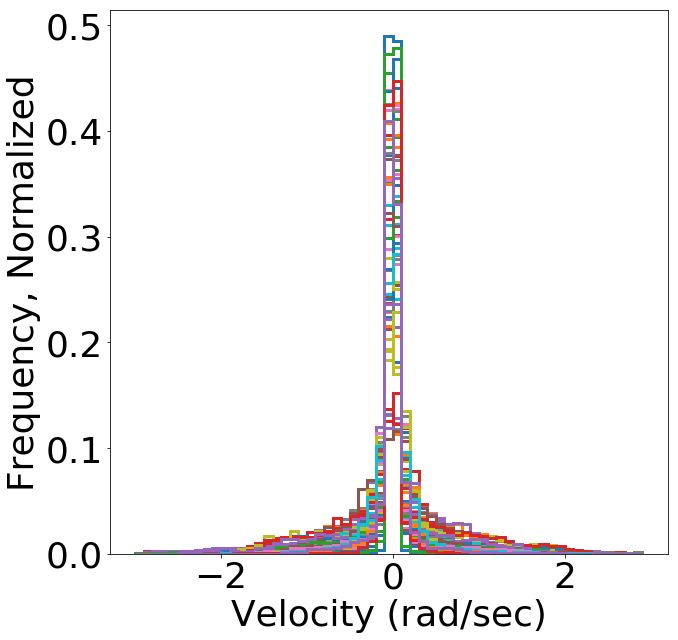

In [82]:
############
### Plot ###
############

fig = plt.figure(figsize=(10, 10))

types = ['vertical', 'horizontal', 'checker', 'dark', 'grey', 'bright']
bins = np.ndarray.tolist(np.arange(-3,3,.1))
behavior = 'dRotLabY'

for i, type in enumerate(['dark']):
    for k, fly in enumerate(flies):
        if fly.x is not None and fly.y is not None:
            if fly.type == type:
                vector = fly.av
                weights = np.ones_like(vector)/float(len(vector))
                binned,throwaway,throwaway2=plt.hist(vector,bins,weights=weights,label = str(i),stacked=True, histtype = 'step',linewidth=3)
    

#plt.title('Visual Stimuli')
#plt.xlim(0,5)
#plt.ylim(0,.25)
plt.xlabel('Velocity (rad/sec)')
plt.ylabel('Frequency, Normalized')
#plt.plot(0.32405,0.3207,'ko',markersize=10)
plt.show()

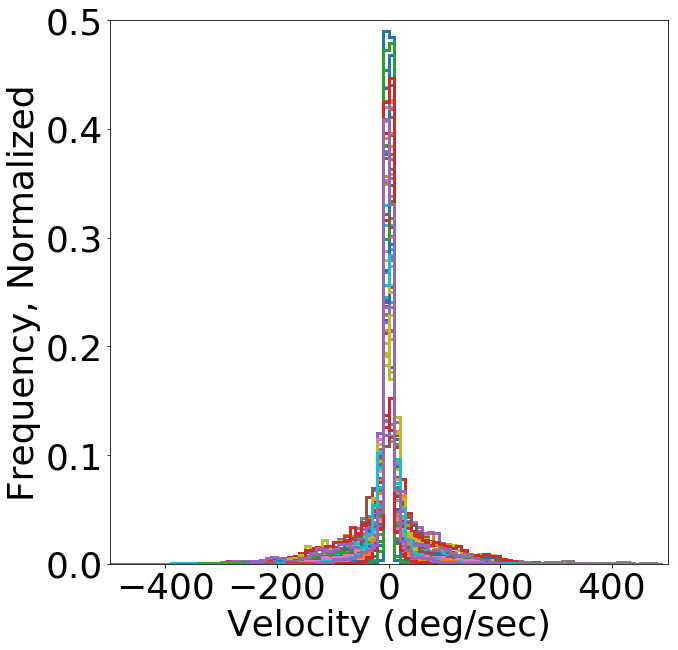

In [94]:
############
### Plot ###
############

fig = plt.figure(figsize=(10, 10))
bins = np.ndarray.tolist(np.arange(-500,500,10))
behavior = 'dRotLabZ'

for i, type in enumerate(['dark']):
    for k, fly in enumerate(flies):
        if fly.x is not None and fly.y is not None:
            if fly.type == type:
                #vector = fly.av
                #weights = np.ones_like(vector)/float(len(vector))
                #binned,throwaway,throwaway2=plt.hist(vector,bins,weights=weights,label = str(i),stacked=True, histtype = 'step',linewidth=3)
                vector = fly.av * 100
                #vector = vector * 50 # now in deg per sec
                weights = np.ones_like(vector)/float(len(vector))
                binned,throwaway,throwaway2=plt.hist(vector,bins,weights=weights,label = str(i),stacked=True, linewidth=3,histtype = 'step')
                binned_data.append(binned)

#plt.title('Visual Stimuli')
plt.xlim(-500,500)
plt.ylim(0,.5)
plt.xlabel('Velocity (deg/sec)')
plt.ylabel('Frequency, Normalized')
#plt.plot(0.32405,0.3207,'ko',markersize=10)
plt.show()

In [70]:
bins = np.ndarray.tolist(np.arange(-500,500,10))
fig = plt.figure(figsize=(10,10))
behavior = 'dRotLabZ'
sphere_radius = 4.5e-3 #3.175e-3 #
binned_data = []
for i in range(len(fictracs)):
    vector = np.rad2deg(fictracs[i][behavior]) # now in deg per 20ms
    vector = vector * 50 # now in deg per sec
    weights = np.ones_like(vector)/float(len(vector))
    binned,throwaway,throwaway2=plt.hist(vector,bins,weights=weights,label = str(i),stacked=True, linewidth=3,histtype = 'step')
    binned_data.append(binned)

185